<h1>Test with synthetic data</h1>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pylab as plt
import numpy as np
import pandas as pd
import seaborn as sns
from IPython.display import display, HTML

from multifile_lda import MultifileLDA
from lda_generate_data import LdaDataGenerator

<h2>1. Generate some synthetic data</h2>

In [2]:
K = 10
n_docs = 100
vocab_size = 200
document_length = 100
copies = 3

alpha = 0.1
beta = 0.01    

In [3]:
gen = LdaDataGenerator(alpha, make_plot=True)

Generating input DF


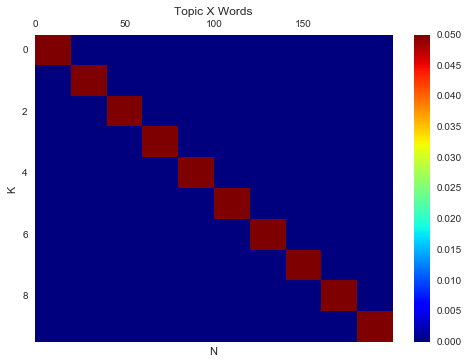

(100, 200)


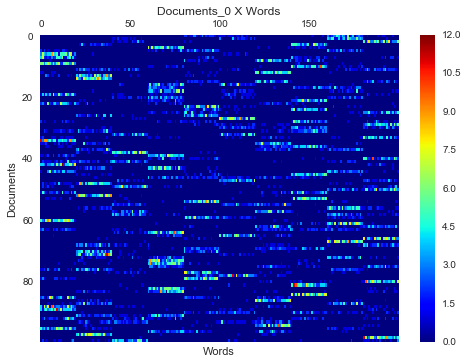

(100, 200)


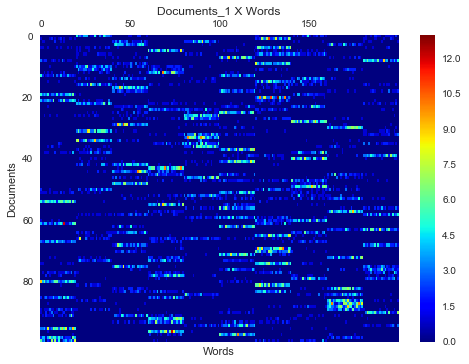

(100, 200)


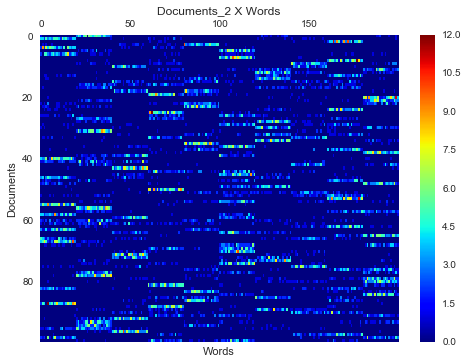

In [4]:
dfs, vocab = gen.generate_input_df(K, vocab_size, document_length, n_docs, copies)

In [5]:
print vocab[0:10]

['word_0' 'word_1' 'word_2' 'word_3' 'word_4' 'word_5' 'word_6' 'word_7'
 'word_8' 'word_9']


<h2>2. Run LDA</h2>

In [6]:
lda = MultifileLDA()
lda.load_synthetic(dfs, vocab)

In [7]:
n_samples = 200
n_burn = 0
n_thin = 1
lda.run(K, alpha, beta, n_burn, n_samples, n_thin)

Initialising 
 - file 0 ..........
 - file 1 ..........
 - file 2 ..........

Using Numpy for multi-file LDA sampling
Sample      1 ..  Log likelihood = -234916.623 
Sample      2 ..  Log likelihood = -222880.341 
Sample      3 ..  Log likelihood = -199795.363 
Sample      4 ..  Log likelihood = -172554.663 
Sample      5 ..  Log likelihood = -154257.946 
Sample      6 ..  Log likelihood = -144224.810 
Sample      7 ..  Log likelihood = -137513.580 
Sample      8 ..  Log likelihood = -133657.704 
Sample      9 ..  Log likelihood = -131055.950 
Sample     10 ..  Log likelihood = -129192.349 
Sample     11 ..  Log likelihood = -128246.621 
Sample     12 ..  Log likelihood = -127558.731 
Sample     13 ..  Log likelihood = -126871.576 
Sample     14 ..  Log likelihood = -126406.478 
Sample     15 ..  Log likelihood = -126050.898 
Sample     16 ..  Log likelihood = -125864.232 
Sample     17 ..  Log likelihood = -125562.257 
Sample     18 ..  Log likelihood = -125425.479 
Sample     19 ..  

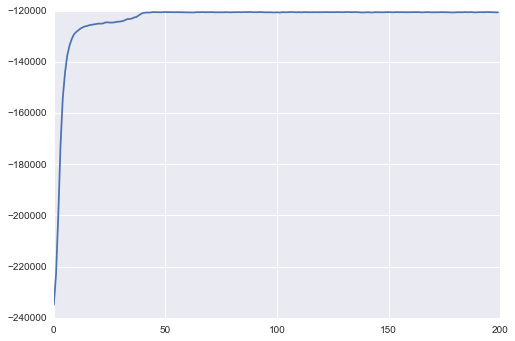

In [8]:
plt.plot(lda.log_likelihoods)

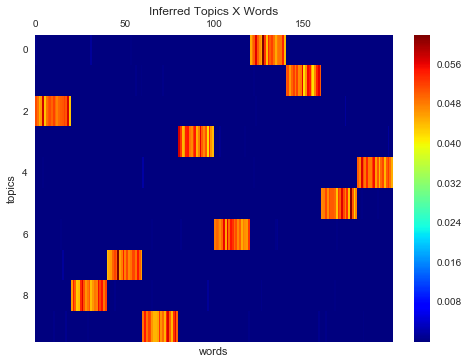

In [9]:
gen._plot_nicely(lda.topic_word_, 'Inferred Topics X Words', 'words', 'topics')

,file,M2M,alpha
0,0,0,0.103571
1,0,1,0.094462
2,0,2,0.094390
3,0,3,0.101573
4,0,4,0.113454
5,0,5,0.109188
6,0,6,0.080084
7,0,7,0.101509
8,0,8,0.109199
9,0,9,0.092571


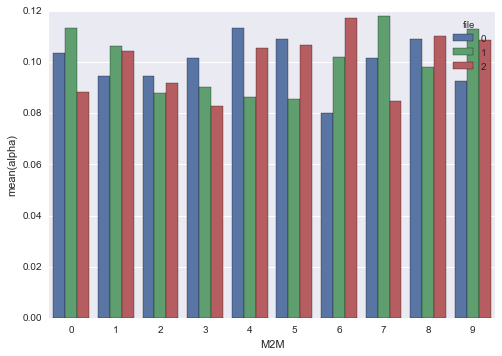

In [10]:
lda.plot_e_alphas()